In [26]:
myfile=r'/Users/ed/Dropbox/Python/Dataset/Data/Data/winequality-white.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [27]:
wine=wine[["sulphates","alcohol"]]

In [28]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [29]:
wine.describe()

,sulphates,alcohol
count,4898.000000,4898.000000
mean,0.489847,10.514267
std,0.114126,1.230621
min,0.220000,8.000000
25%,0.410000,9.500000
50%,0.470000,10.400000
75%,0.550000,11.400000
max,1.080000,14.200000


In [30]:
wine_std=pd.DataFrame(scale(wine),
                      columns=list(wine.columns))

In [31]:
wine_std.describe()

,sulphates,alcohol
count,4.898000e+03,4.898000e+03
mean,-7.572999e-16,-2.178784e-15
std,1.000102e+00,1.000102e+00
min,-2.364709e+00,-2.043297e+00
25%,-6.997104e-01,-8.242757e-01
50%,-1.739212e-01,-9.286267e-02
75%,5.271310e-01,7.198184e-01
max,5.171602e+00,2.995326e+00


In [33]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In [34]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k,silhouette_score(wine_std,kmeans.labels_))

2 0.3739606160278498
3 0.4108733144046192
4 0.3807889880138742
5 0.33457661751536383
6 0.3511329909762325
7 0.3527609066409706
8 0.35406429913010123
9 0.35041397914530015


In [44]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
kmeans.labels_

array([1, 1, 1, ..., 1, 2, 2], dtype=int32)

In [46]:
labels = kmeans.labels_
wine["cluster"]=labels

In [47]:
wine['cluster'].value_counts()

1    1923
2    1376
0    1205
3     394
Name: cluster, dtype: int64

In [48]:
wine.groupby(['cluster']).mean()

,sulphates,alcohol
cluster,,
0,0.591693,10.123994
1,0.439163,9.525654
2,0.413365,11.826163
3,0.692843,11.951354


In [49]:
import seaborn as sns

In [50]:
%matplotlib inline

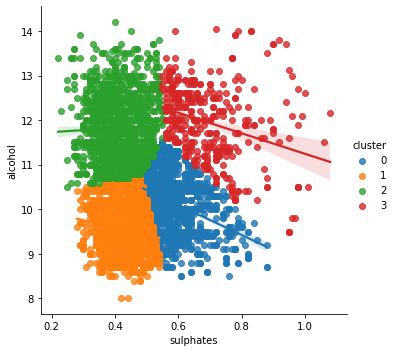

In [51]:
sns.lmplot(fit_reg=True,x='sulphates',y='alcohol',data=wine,hue='cluster')

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(wine_std)
    silhouette_avg = silhouette_score(wine_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.3091095689547383
For n_clusters = 3 The average silhouette_score is: 0.36507065689263013
For n_clusters = 4 The average silhouette_score is: 0.36394118955693916
For n_clusters = 5 The average silhouette_score is: 0.2849369402765109
For n_clusters = 6 The average silhouette_score is: 0.28173689619112985
For n_clusters = 7 The average silhouette_score is: 0.30584775050004287
For n_clusters = 8 The average silhouette_score is: 0.29918403546397854
For n_clusters = 9 The average silhouette_score is: 0.2931385252344828


In [54]:
k=3
hclus=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')


In [55]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster.hierarchical:

class AgglomerativeClustering(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func='deprecated', distance_threshold=None)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, optional (default=2)
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : string or callable, default: "euclidean"
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is acce

In [56]:
labels_hclus=hclus.fit_predict(wine_std)

In [57]:
wine['cluster_hclus']=labels_hclus

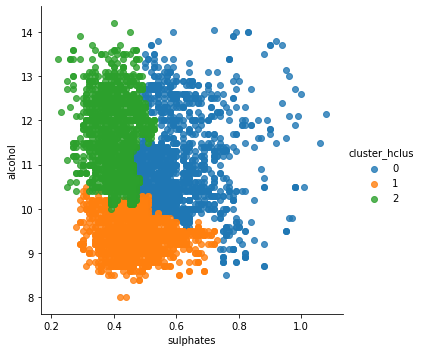

In [58]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster_hclus')

In [ ]:
wine.head()

# DBSCAN

In [59]:

mydata=pd.read_csv("/Users/ed/Dropbox/Python/Dataset/Data/Data/moon_data.csv").iloc[:,1:]
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


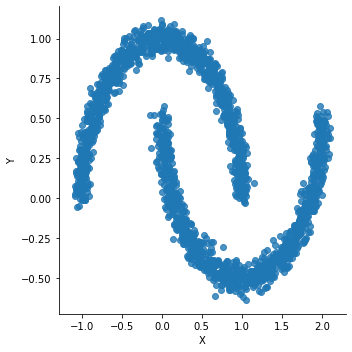

In [60]:
sns.lmplot('X','Y',data=mydata,fit_reg=False) 

In [61]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

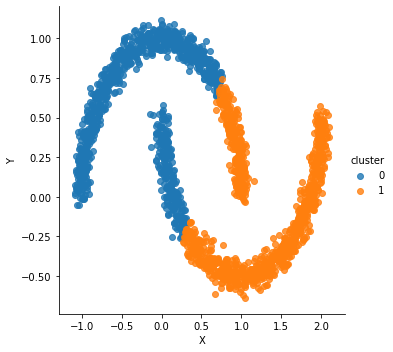

In [62]:
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
del mydata['cluster']

In [66]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster.dbscan_:

class DBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_samples :

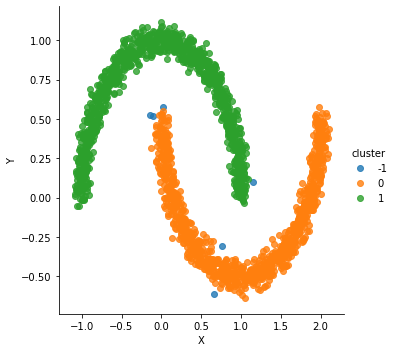

In [69]:
db = DBSCAN(eps=0.1, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)


In [70]:
pd.Series(db.labels_).value_counts()

 1    999
 0    995
-1      6
dtype: int64

# anamoly detection with dbscan

In [71]:
myfile=r'/Users/ed/Dropbox/Python/Dataset/Data/Data/Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

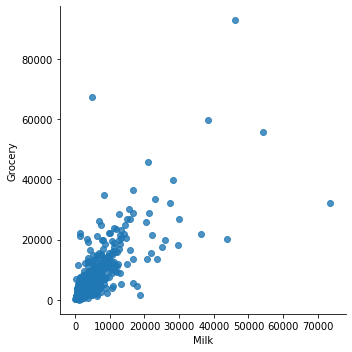

In [72]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False)

In [74]:
r=np.linspace(0.5,5)
r

array([0.5       , 0.59183673, 0.68367347, 0.7755102 , 0.86734694,
       0.95918367, 1.05102041, 1.14285714, 1.23469388, 1.32653061,
       1.41836735, 1.51020408, 1.60204082, 1.69387755, 1.78571429,
       1.87755102, 1.96938776, 2.06122449, 2.15306122, 2.24489796,
       2.33673469, 2.42857143, 2.52040816, 2.6122449 , 2.70408163,
       2.79591837, 2.8877551 , 2.97959184, 3.07142857, 3.16326531,
       3.25510204, 3.34693878, 3.43877551, 3.53061224, 3.62244898,
       3.71428571, 3.80612245, 3.89795918, 3.98979592, 4.08163265,
       4.17346939, 4.26530612, 4.35714286, 4.44897959, 4.54081633,
       4.63265306, 4.7244898 , 4.81632653, 4.90816327, 5.        ])

In [75]:

m=np.linspace(10,100,10)
m

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [76]:
r=np.linspace(0.5,5)
m=np.linspace(10,100,10)
for mins in m:
    for epsilon in r:
        db = DBSCAN(eps=epsilon, min_samples=mins, metric='euclidean').fit(groc_std)
        labels = db.labels_
    #     n_clust=len(set(labels))-1
        outlier=np.round((labels == -1).sum()/len(labels)*100,2)
    #     print('Estimated number of clusters: %d', n_clust)
        print("For epsilon =", epsilon ," and number of min samples", mins, ", percentage of outliers is: ",outlier)

For epsilon = 0.5  and number of min samples 10.0 , percentage of outliers is:  7.27
For epsilon = 0.5918367346938775  and number of min samples 10.0 , percentage of outliers is:  6.14
For epsilon = 0.6836734693877551  and number of min samples 10.0 , percentage of outliers is:  5.23
For epsilon = 0.7755102040816326  and number of min samples 10.0 , percentage of outliers is:  4.77
For epsilon = 0.8673469387755102  and number of min samples 10.0 , percentage of outliers is:  4.09
For epsilon = 0.9591836734693877  and number of min samples 10.0 , percentage of outliers is:  3.64
For epsilon = 1.0510204081632653  and number of min samples 10.0 , percentage of outliers is:  2.5
For epsilon = 1.1428571428571428  and number of min samples 10.0 , percentage of outliers is:  2.05
For epsilon = 1.2346938775510203  and number of min samples 10.0 , percentage of outliers is:  1.59
For epsilon = 1.3265306122448979  and number of min samples 10.0 , percentage of outliers is:  1.36
For epsilon = 1.

In [77]:
db = DBSCAN(eps=0.77, min_samples=20, metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

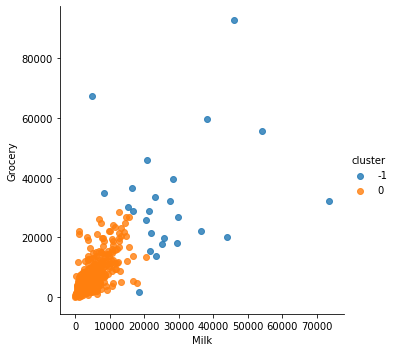

In [78]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')